Cargo los datos en un dataframe:
-

In [2]:
import pandas as pd
arval_table = pd.read_csv('fuel_joined_toJavi.txt', sep='|',engine= 'python')

arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
0,4230401,20FEB2018:07:51:00.000,Diesel,DIESEL,$39.66,1401,13575773,44.68,$50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,27FEB2018:11:50:00.000,Diesel,DIESEL,$46.93,1401,13830589,49.21,$59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,01FEB2018:13:57:00.000,Diesel,DIESEL,$64.23,1401,9456266,69.77,$80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,20FEB2018:19:58:00.000,Diesel,DIESEL,$48.72,1401,9456513,52.45,$61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,05FEB2018:14:35:00.000,Diesel,DIESEL,$38.52,1401,13575773,42.22,$48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1


Obtengo los campos y dimensión de la tabla de datos:
-

In [168]:
arval_table.shape

(1608957, 35)

In [169]:
arval_table.columns


Index(['IdLigneEtat', 'DateHeure', 'LibelleCategorieProduit', 'LibelleProduit',
       'TotalNetHT', 'IdClient', 'IdVehicule', 'Quantite', 'TotalBrutTTC',
       'TipoOperacion', 'CodeTypeLigneEtat', 'BonifTotal', 'CodeProduit',
       'CodeProduitInterne', 'IdCentreFactClient', 'KmSaisie', 'PUBrutTTC',
       'DateEcheance', 'TotalBrutTVA', 'LibelleCentreAnalytique', 'TauxTVA',
       'IdFluxCarburant', 'IdGestionnaire', 'IdEquipe', 'CodeMarque',
       'DupLibelleTypeVehicule', 'DupLibelleModeleVehicule', 'DupConsommation',
       'CapaciteReservoir', 'libelle_marque', 'libelle_energie',
       'CodeDivision', 'ReferenceORFI', 'tipo_pack', 'flag_dctoEESS'],
      dtype='object')

1.Confirmamos que el campo IdLigneEtat tiene exactamente los mismos valores únicos que el número de filas del dataframe por lo que se podría usar como Primary Key que identifica cada operación.-
-

In [170]:
id=arval_table["IdLigneEtat"].unique()
len(id)

1608957

2.Queremos ver el rango de fechas de las que hay datos; recorto el campo Fecha y Hora para quedarnos solo con la fecha:
-

In [500]:
arval_table['DateHeure'] = arval_table['DateHeure'].str.split(':').str[0]

arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
DateHeure,,,,,,,,,,,,,,,,,,,,,
0,4230401,20FEB2018,Diesel,DIESEL,$39.66,1401,13575773,44.68,$50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,27FEB2018,Diesel,DIESEL,$46.93,1401,13830589,49.21,$59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,01FEB2018,Diesel,DIESEL,$64.23,1401,9456266,69.77,$80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,20FEB2018,Diesel,DIESEL,$48.72,1401,9456513,52.45,$61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,05FEB2018,Diesel,DIESEL,$38.52,1401,13575773,42.22,$48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1


In [502]:
arval_table['DateHeure'].dtype

dtype('O')

In [503]:
arval_table['DateHeure'] =  pd.to_datetime(arval_table['DateHeure'], infer_datetime_format=True)
arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
DateHeure,,,,,,,,,,,,,,,,,,,,,
0,4230401,2018-02-20,Diesel,DIESEL,$39.66,1401,13575773,44.68,$50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,2018-02-27,Diesel,DIESEL,$46.93,1401,13830589,49.21,$59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,2018-02-01,Diesel,DIESEL,$64.23,1401,9456266,69.77,$80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,2018-02-20,Diesel,DIESEL,$48.72,1401,9456513,52.45,$61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,2018-02-05,Diesel,DIESEL,$38.52,1401,13575773,42.22,$48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1


Obtenemos el número de días en los que existen registros
-

In [504]:
fechas=arval_table['DateHeure'].unique()

In [505]:
len(fechas)

750

Obtenemos el primer día y último en el que existen registros y obtenemos el número de días entre ambos:
-

In [506]:
fecha_minima = min(fechas)
fecha_máxima = max(fechas)

In [507]:
print(fecha_minima)

2016-05-23T00:00:00.000000000


In [508]:
print(fecha_máxima)

2018-06-30T00:00:00.000000000


In [519]:
import numpy as np
diferencia=np.datetime64(fecha_máxima,'D') - np.datetime64(fecha_minima,'D')
print(diferencia)

768 days


Vemos que hay 18 días en los que no se ha registrado ninguna operación y los localizamos:
-

In [510]:
arval_table.index.names = ['DateHeure']


In [523]:
pd.date_range(start = '2016-05-23', end = '2018-06-30' ).difference(arval_table['DateHeure'])

DatetimeIndex(['2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27',
               '2016-05-28', '2016-05-29', '2016-05-30', '2016-05-31',
               '2016-06-01', '2016-06-03', '2016-06-04', '2016-06-05',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-11', '2016-06-12', '2016-06-13'],
              dtype='datetime64[ns]', freq=None)

La única explicación que se me ocurre es que se les cayera el sistema informático esos días o el volcado de datos y las EESS pasaran los datos de las operaciones más adelante...???

In [524]:
arval_table[(arval_table['DateHeure'] > '2016-05-23') & (arval_table['DateHeure'] < '2016-06-13')]

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
DateHeure,,,,,,,,,,,,,,,,,,,,,
55083,3036366,2016-06-02,Peages,AUTOPISTA ANDORRA,$6.32,6982,8207669,0.0,$6.60,V,...,NUEVO LE�N,1.6 TDI 105cv St&Sp Reference Plus,3.8,50.0,SEAT,DIESEL,PCB,22254,Pack Basic,0
55104,3036367,2016-06-02,Peages,AUTOPISTA ANDORRA,$6.32,6982,8207669,0.0,$6.60,V,...,NUEVO LE�N,1.6 TDI 105cv St&Sp Reference Plus,3.8,50.0,SEAT,DIESEL,PCB,22254,Pack Basic,0
203409,3078965,2016-06-06,Peages,AUTOPISTAS,$20.08,83978,4376838,0.0,$24.30,D,...,RANGER VU 2p 5G pickup,2.5 TDCi 4x4 Cabina Sencilla XL,9.3,70.0,FORD,DIESEL,0,608073,Pack Clasico,0
203831,3078964,2016-06-06,Peages,AUTOPISTAS,$23.62,83978,4382845,0.0,$28.58,D,...,RANGER VU 2p 5G pickup,2.5 TDCi 4x4 Cabina Sencilla XL,9.3,70.0,FORD,DIESEL,0,608073,Pack Clasico,0
203993,3078963,2016-06-06,Peages,AUTOPISTAS,$4.15,83978,4382845,0.0,$5.02,D,...,RANGER VU 2p 5G pickup,2.5 TDCi 4x4 Cabina Sencilla XL,9.3,70.0,FORD,DIESEL,0,608073,Pack Clasico,0
205105,3078966,2016-06-06,Peages,AUTOPISTAS,$11.02,83978,4376838,0.0,$13.34,D,...,RANGER VU 2p 5G pickup,2.5 TDCi 4x4 Cabina Sencilla XL,9.3,70.0,FORD,DIESEL,0,608073,Pack Clasico,0


3.Búsqueda de Categoría de Productos
-

In [185]:
conceptos_categoría_productos=arval_table['LibelleCategorieProduit'].unique()
print(conceptos_categoría_productos)

['Diesel' 'Diversas' 'Gasolina' 'Peages' nan]


4.Búsqueda de Conceptos de Productos
-

In [186]:
conceptos_productos=arval_table['LibelleProduit'].unique()
print(conceptos_productos)

['DIESEL' 'Diesel +' 'AdBlueRepsol' 'GAS. S/PLOMO' 'GAS. S/PLOMO 98'
 'GAS. S/PLOMO 95 PREMIUM' 'AUTOPISTAS' 'OTROS PRODUCTOS' 'APARCAMIENTO'
 'DIESEL (ANDORRA)' 'acceso mercados' 'AdBlue' 'LAV.ENGRASE' 'AutoGas'
 'LUBRICANTES' 'Diesel e+10 ((Portugal)' 'AUTOPISTA ANDORRA'
 'DIESEL e+10 (ANDORRA)' 'VIAT INTER' 'GASOLEO' 'DIESEL (CANARIAS)'
 'DIESEL e+10 CANARIAS' 'AdBlue ANDORRA' 'GAS. S/PLOMO 95 (ANDORRA)'
 'GASOLINA 9' 'GASOLEO M' 'LAV.ENGRASE(CANARIAS)' 'EFITEC95PR'
 'AdBlueRep CANARIAS' 'AdBlue CANARIAS' 'DEVOL.AUTO'
 'GAS. S/PLOMO 95 (CANARIAS)' 'GAS. S/PLOMO 98 (PORTUGAL)'
 'GAS. S/PLOMO 98 (CANARIAS)' 'GASOLEO A' 'PROMOCIONE']


5.Número de clientes distintos de Arval que usen estos servicios:
-

In [187]:
clientes=arval_table['IdClient'].unique()
len(clientes)

722

Obtenemos 722 clientes distintos que usan los servicios

6.Número de clientes que se han dado de baja en el último mes (calculo el numero de clientes únicos de todo el periodo y del último mes y la resta será el número de bajas o al menos el número de clientes que no han usado los servicios en el último mes)
-

In [188]:
clientes_operaciones_periodo=arval_table[(arval_table['DateHeure'] > '2016-05-23') & (arval_table['DateHeure'] < '2018-05-31')].IdClient
clientes_operaciones_ultimo_mes = arval_table[(arval_table['DateHeure'] > '2018-06-01') & (arval_table['DateHeure'] < '2018-06-30')].IdClient

In [189]:
len(clientes_operaciones_periodo.unique())

699

In [190]:
len(clientes_operaciones_ultimo_mes.unique())

625

In [191]:
len(clientes_operaciones_periodo.unique())-len(clientes_operaciones_ultimo_mes.unique())

74

Obtenemos 74 clientes que han dejado de usar el servicio o se han dado de baja en el último mes.

7.Cual es el mejor cliente (empresa individual) según TotalBrutTTC (considero primero como mejor cliente aquel que gasta más)
-

In [192]:
arval_table['TotalBrutTTC'].dtype

dtype('O')

In [193]:
arval_table['TotalBrutTTC'] = arval_table['TotalBrutTTC'].str.replace(r'\D', '').astype(int)

In [194]:
arval_table['TotalBrutTTC'] = arval_table['TotalBrutTTC']/100
arval_table

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
0,4230401,2018-02-20,Diesel,DIESEL,$39.66,1401,13575773,44.68,50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,2018-02-27,Diesel,DIESEL,$46.93,1401,13830589,49.21,59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,2018-02-01,Diesel,DIESEL,$64.23,1401,9456266,69.77,80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,2018-02-20,Diesel,DIESEL,$48.72,1401,9456513,52.45,61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,2018-02-05,Diesel,DIESEL,$38.52,1401,13575773,42.22,48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
5,4229704,2018-02-11,Diesel,DIESEL,$62.52,1401,9456513,66.13,78.63,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
6,4229707,2018-02-23,Diesel,DIESEL,$55.31,1401,9456513,60.08,69.63,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
7,4230751,2018-02-08,Diesel,DIESEL,$46.90,1401,13830589,50.04,59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
8,4230400,2018-02-14,Diesel,DIESEL,$37.38,1401,13575773,39.88,47.02,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
9,4229706,2018-02-22,Diesel,DIESEL,$44.53,1401,9456513,47.10,56.00,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1


In [157]:
TotalBrutTTC_client = arval_table.groupby(['IdClient'])['TotalBrutTTC'].sum()


In [205]:
TotalBrutTTC_client=pd.DataFrame(TotalBrutTTC_client)
TotalBrutTTC_client.sort_values('TotalBrutTTC')

,TotalBrutTTC
IdClient,
945541,2.000000e+01
945744,3.400000e+01
980937,4.300000e+01
1077170,5.000000e+01
777901,5.000000e+01
943736,5.000000e+01
529072,5.269000e+01
115657,5.600000e+01
1177,6.267000e+01


In [197]:
TotalBrutTTC_client.loc[TotalBrutTTC_client['TotalBrutTTC'].idxmax()]

TotalBrutTTC    4.079624e+06
Name: 83978, dtype: float64

Por tanto el mejor cliente según gasto total bruto sería el 83978 con un total de 4.079.624$.

8.Cual es el mejor cliente (empresa individual) según Bonificación Total (considero como mejor cliente aquel con mayor bonificación) :
-

In [198]:
arval_table['BonifTotal'] = arval_table['BonifTotal'].str.replace(r'\D', '').astype(int)
arval_table['BonifTotal'] = arval_table['BonifTotal']/100
arval_table

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
0,4230401,2018-02-20,Diesel,DIESEL,$39.66,1401,13575773,44.68,50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,2018-02-27,Diesel,DIESEL,$46.93,1401,13830589,49.21,59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,2018-02-01,Diesel,DIESEL,$64.23,1401,9456266,69.77,80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,2018-02-20,Diesel,DIESEL,$48.72,1401,9456513,52.45,61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,2018-02-05,Diesel,DIESEL,$38.52,1401,13575773,42.22,48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
5,4229704,2018-02-11,Diesel,DIESEL,$62.52,1401,9456513,66.13,78.63,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
6,4229707,2018-02-23,Diesel,DIESEL,$55.31,1401,9456513,60.08,69.63,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
7,4230751,2018-02-08,Diesel,DIESEL,$46.90,1401,13830589,50.04,59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
8,4230400,2018-02-14,Diesel,DIESEL,$37.38,1401,13575773,39.88,47.02,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
9,4229706,2018-02-22,Diesel,DIESEL,$44.53,1401,9456513,47.10,56.00,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1


In [199]:
Total_Bonif_client = arval_table.groupby(['IdClient'])['BonifTotal'].sum()

In [206]:
Total_Bonif_client=pd.DataFrame(Total_Bonif_client)


In [207]:
Total_Bonif_client.loc[Total_Bonif_client['BonifTotal'].idxmax()]

BonifTotal    151174.15
Name: 83978, dtype: float64

In [208]:
Total_Bonif_client.sort_values('BonifTotal')

,BonifTotal
IdClient,
739631,0.00
9248,0.00
18899,0.00
674076,0.34
61882,0.56
943736,0.68
945541,0.87
980937,1.33
529072,1.51


9.Cual es el mejor cliente (empresa individual) según Número de Operaciones (considero como mejor cliente aquel con mayor número de registros) :
-

In [278]:
(arval_table['IdClient'].value_counts() / len(arval_table['IdClient']))*100

10269      14.450542
83978       7.853970
39346       4.850782
414126      2.949178
1166        2.913937
131134      2.886342
16106       2.555009
526760      2.356931
115402      1.924477
16170       1.829197
9069        1.535902
42116       1.494136
23981       1.438696
933519      1.281141
11193       1.202083
79319       1.189777
1253        1.103199
410942      1.068270
373865      0.953723
390586      0.897662
41488       0.862484
115493      0.850116
107292      0.839985
83970       0.785291
130722      0.779511
45407       0.746944
2343        0.683611
412784      0.668073
34402       0.661112
981109      0.651602
             ...    
658865      0.000249
911929      0.000249
1917        0.000249
1110160     0.000249
107984      0.000186
939459      0.000186
381162      0.000186
388103      0.000186
940400      0.000186
500649      0.000186
1021258     0.000186
867725      0.000186
391719      0.000186
1101982     0.000186
911004      0.000186
43504       0.000124
355019      0

Podemos ver que el "mejor cliente" coincide tanto por facturación como por bonificación (151174.15$), lo cual no tendría porqué ser así ( un cliente puede facturar mucho y no bonificar mucho o viceversa ) pero sin embargo es el segundo mejor cliente según número de operaciones .

10.¿Por qué separan en los tipos de producto Canarias, Andorra y no separan otras provincias?-
-

Sospechamos que la separación pueda venir debida a diferente fiscalidad,por lo que obtenemos los diferentes tipos impositivos aplicados:

In [4]:
tipos_impositivos=arval_table['TauxTVA'].unique()
print(tipos_impositivos)

[21.  23.   0.   4.5 60.   7. ]


In [11]:
operaciones_0 = arval_table[(arval_table['TauxTVA'] ==0)].LibelleProduit.unique()
print(operaciones_0)

['AUTOPISTAS' 'DIESEL (CANARIAS)' 'DIESEL e+10 CANARIAS' 'GASOLEO M'
 'AdBlueRep CANARIAS' 'AdBlue CANARIAS' 'DEVOL.AUTO'
 'GAS. S/PLOMO 95 (CANARIAS)' 'GAS. S/PLOMO 98 (CANARIAS)']


In [10]:
operaciones_4_5 = arval_table[(arval_table['TauxTVA'] ==4.5)].LibelleProduit.unique()
print(operaciones_4_5)

['DIESEL (ANDORRA)' 'OTROS PRODUCTOS' 'AUTOPISTA ANDORRA'
 'DIESEL e+10 (ANDORRA)' 'AdBlue ANDORRA' 'GAS. S/PLOMO 95 (ANDORRA)']


In [9]:
operaciones_60 = arval_table[(arval_table['TauxTVA'] ==60)].LibelleProduit.unique()
print(operaciones_60)

['VIAT INTER']


In [12]:
operaciones_7 = arval_table[(arval_table['TauxTVA'] ==60)].LibelleProduit.unique()
print(operaciones_7)

['VIAT INTER']


In [13]:
operaciones_23 = arval_table[(arval_table['TauxTVA'] ==23)].LibelleProduit.unique()
print(operaciones_23)

['OTROS PRODUCTOS' 'Diesel e+10 ((Portugal)' 'VIAT INTER' 'GASOLEO'
 'GASOLINA 9' 'EFITEC95PR' 'GAS. S/PLOMO 98 (PORTUGAL)']


Parece claro que se separan esas provincias por tener un tipo impositivo diferente del resto general así como las operaciones realizadas en Portugal ( 23% )

11.¿Cuál es el peso porcentual de cada uno de los productos que se compran con la tarjeta: combustible, peajes,etc?
-

In [14]:
conceptos_categoría_productos=arval_table['LibelleCategorieProduit'].unique()
print(conceptos_categoría_productos)

['Diesel' 'Diversas' 'Gasolina' 'Peages' nan]


In [16]:
arval_table['TotalNetHT'] = arval_table['TotalNetHT'].str.replace(r'\D', '').astype(int)



,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
0,4230401,20FEB2018:07:51:00.000,Diesel,DIESEL,3966,1401,13575773,44.68,$50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,27FEB2018:11:50:00.000,Diesel,DIESEL,4693,1401,13830589,49.21,$59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,01FEB2018:13:57:00.000,Diesel,DIESEL,6423,1401,9456266,69.77,$80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,20FEB2018:19:58:00.000,Diesel,DIESEL,4872,1401,9456513,52.45,$61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,05FEB2018:14:35:00.000,Diesel,DIESEL,3852,1401,13575773,42.22,$48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1


In [17]:
arval_table['TotalNetHT'] = arval_table['TotalNetHT']/100
arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
0,4230401,20FEB2018:07:51:00.000,Diesel,DIESEL,39.66,1401,13575773,44.68,$50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,27FEB2018:11:50:00.000,Diesel,DIESEL,46.93,1401,13830589,49.21,$59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,01FEB2018:13:57:00.000,Diesel,DIESEL,64.23,1401,9456266,69.77,$80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,20FEB2018:19:58:00.000,Diesel,DIESEL,48.72,1401,9456513,52.45,$61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,05FEB2018:14:35:00.000,Diesel,DIESEL,38.52,1401,13575773,42.22,$48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1


In [22]:
Total_Fact_Categoría_Prod = arval_table.groupby(['LibelleCategorieProduit'])['TotalNetHT'].sum()
Total_Fact_Categoría_Prod=pd.DataFrame(Total_Fact_Categoría_Prod)
print(Total_Fact_Categoría_Prod)

                           TotalNetHT
LibelleCategorieProduit              
Diesel                   2.765132e+07
Diversas                 1.564669e+05
Gasolina                 6.301294e+05
Peages                   2.954647e+06


In [24]:
Total_Fact_Categoría_Prod['%_Categoría'] = Total_Fact_Categoría_Prod['TotalNetHT'] / Total_Fact_Categoría_Prod['TotalNetHT'].sum()* 100
print(Total_Fact_Categoría_Prod)

                           TotalNetHT  %_Categoría
LibelleCategorieProduit                           
Diesel                   2.765132e+07    88.082389
Diversas                 1.564669e+05     0.498420
Gasolina                 6.301294e+05     2.007257
Peages                   2.954647e+06     9.411933


Como podemos ver aproximadamente el 90% de la facturación corresponde a combustible (88% Diesel y 2% Gasolina) 
, aproximadamente el 10% restante corresponde a peajes y un 0.5% a compras diversas.

12.En teoría hay datos de Cantidad de litros, de precio por litro, de importe neto, del IVA por separado, del importe total (IVA incluido), de bonificaciones. ¿Tienen sentido, es decir, el importe neto mas el iva da el importe total?. Haz verificaciones de ese tipo
-

In [326]:
arval_table['TotalBrutTTC'] = arval_table['TotalBrutTTC'].str.replace(r'\D', '').astype(int)
arval_table['TotalBrutTTC'] = arval_table['TotalBrutTTC']/100
arval_table['TotalBrutTVA'] = arval_table['TotalBrutTVA'].str.replace(r'\D', '').astype(int)
arval_table['TotalBrutTVA'] = arval_table['TotalBrutTVA']/100




In [201]:
import warnings
warnings.filterwarnings("ignore")



In [43]:
arval_table2= arval_table[['TotalNetHT','TotalBrutTVA','TotalBrutTTC']]
arval_table2['Bruto_Teórico']=arval_table2['TotalNetHT']+arval_table2['TotalBrutTVA']
arval_table2['Diferencia_brutos']=arval_table2['TotalBrutTTC']-arval_table2['Bruto_Teórico']
arval_table2['distinto']=arval_table2['Diferencia_brutos']!=0
arval_table2.head()


,TotalNetHT,TotalBrutTVA,TotalBrutTTC,Bruto_Teórico,Diferencia_brutos,distinto
0,39.66,8.68,50.00,48.34,1.66,True
1,46.93,10.24,59.00,57.17,1.83,True
2,64.23,14.03,80.86,78.26,2.60,True
3,48.72,10.64,61.31,59.36,1.95,True
4,38.52,8.42,48.51,46.94,1.57,True


In [51]:
t=arval_table2[arval_table2['distinto']==True]
len(t)

1608957

Como comprobamos no hay ningún registro en que coincidan los importes brutos más impuestos con el neto total.¿Razón?

13.¿Qué meses tienen más volumen de operaciones?
-

In [69]:

arval_table['Mes_Operación'] = arval_table['DateHeure'].dt.month


arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS,Mes_Operación
0,4230401,2018-02-20,Diesel,DIESEL,39.66,1401,13575773,44.68,50.00,V,...,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1,2
1,4230752,2018-02-27,Diesel,DIESEL,46.93,1401,13830589,49.21,59.00,V,...,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1,2
2,4230050,2018-02-01,Diesel,DIESEL,64.23,1401,9456266,69.77,80.86,V,...,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1,2
3,4229705,2018-02-20,Diesel,DIESEL,48.72,1401,9456513,52.45,61.31,V,...,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1,2
4,4230399,2018-02-05,Diesel,DIESEL,38.52,1401,13575773,42.22,48.51,V,...,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1,2


In [78]:
arval_table['Mes_Operación'].value_counts().max



<bound method Series.max of 5     174161
6     172406
3     153544
4     141210
2     137824
11    135403
10    129851
1     127424
9     123138
7     120279
12    110311
8      83406
Name: Mes_Operación, dtype: int64>

In [87]:
arval_table['Mes_Operación'].value_counts().idxmax()

5

In [88]:
arval_table['Mes_Operación'].value_counts().idxmin()

8

Como vemos el mes en el que se producen más operaciones es Mayo y el mínimo es agosto

14-¿Cuál es la marca de vehículo más demandada?
-

In [89]:
arval_table['libelle_marque'].value_counts().idxmax()

'VOLKSWAGEN'

In [ ]:
Como vemos la marca más demandada es Volkswagen (aparecen datos erroneos 'Corto Plazo','Combustible'). 

15.Veamos qué modelos son los más demandados:
-

In [82]:
arval_table['DupLibelleTypeVehicule'].value_counts().max

<bound method Series.max of M�GANE                                 150333
NUEVO LE�N                             112158
CADDY                                   76464
GOLF                                    75195
PASSAT                                  74743
RANGER                                  50194
TOURAN                                  45860
SERIE 2 ACTIVE TOURE                    42347
PARTNER                                 37534
OCTAVIA                                 31541
508                                     24486
308                                     22902
A4                                      22273
FICTICIO                                21330
LEON 5p 2G berlina con port�n           19819
RANGER VU 2p 5G pickup                  18607
CLIO                                    18529
SERIE 1                                 18216
X-TRAIL                                 18055
INSIGNIA                                17946
PASSAT 4p 8G sed�n                      16675
XC60  

Podemos ver que el modelo más demandado? ( más que más demandado es el que más operaciones realiza ) es el Renault Megane.Además observamos que hay un modelo con nombre FICTICIO??

In [92]:
arval_table.groupby(['libelle_marque'])['DupLibelleTypeVehicule'].value_counts().idxmax()

('RENAULT', 'M�GANE')

16.Veamos el número de operaciones por Marca y Modelo
-

In [93]:
arval_table.groupby(['libelle_marque'])['DupLibelleTypeVehicule'].value_counts()

libelle_marque  DupLibelleTypeVehicule             
ALFA ROMEO      GIULIETTA                               1358
                STELVIO                                  112
                GIULIA                                    29
                147 5p 1G berlina con port�n              12
AUDI            A4                                     22273
                Q5                                     12023
                A3                                     10554
                A6                                      5508
                Q7                                      4139
                A5                                      3569
                Q3                                      2743
                A4 ALLROAD QUATTRO                      1776
                A3 5p 3G berlina con port�n             1530
                A4 4p 4G sed�n                          1244
                A3 3p 2G berlina con port�n              979
                Q2               

17.¿Qué marca es la más habitual (porcentualmente)?
-

In [109]:
arval_table.groupby(['libelle_marque'])['IdLigneEtat'].count()/1608957*100


libelle_marque
ALFA ROMEO         0.093912
AUDI               4.703420
BMW                6.834552
CHEVROLET          0.020013
CITROEN            1.320669
Combustible        0.527920
Corto Plazo        0.801327
DACIA              0.210012
DS                 0.000062
EBRO               0.002548
FIAT               3.091506
FORD               7.501008
HONDA              0.113738
HYUNDAI            0.642590
INFINITI           0.041393
ISUZU              0.000249
IVECO              0.006402
JAGUAR             0.082787
JEEP               0.148108
KIA                0.081730
LANCIA             0.072407
LAND ROVER         0.725066
LEXUS              0.414244
MAHINDRA           0.000249
MAN                0.005780
MAZDA              0.381924
MERCEDES           1.058450
MERCEDES-BENZ      0.538610
MINI               0.525185
MITSUBISHI         0.071102
NISSAN             2.445622
OPEL               3.817691
PEUGEOT            7.668260
PORSCHE            0.020262
RENAULT           14.839054
RENAU

18.¿Reflejan todas las operaciones la marca del coche?
-

In [111]:
Marcas=arval_table.groupby(['libelle_marque'])['IdLigneEtat'].count()/1608957*100
Marcas=pd.DataFrame(Marcas)
Marcas['IdLigneEtat'].sum()

99.99999999999999

Comprobamos que la suma nos da el 100%

19.La columna “DupConsumption” tiene el consumo teórico del vehículo. ¿Hay algo que no te cuadre?
-

In [113]:
arval_table['DupConsommation'].unique()

array([40. ,  4.1,  7.9,  4.7,  3.9,  4.6,  7. ,  5.3,  4.5,  5.8,  5. ,
        4.9,  5.1,  5.2,  5.4,  4.2,  4. ,  3.4,  5.7,  4.3,  4.4, 34. ,
        3.8,  4.8,  6.7,  6.2,  3.7, 35. ,  5.6,  3.6,  6.1, 42. ,  8.2,
       46. , 44. , 37. , 64. , 50. , 39. ,  3.5,  3.2, 41. ,  7.2,  5.9,
        6.9, 45. ,  6.5,  5.5, 49. ,  0. ,  7.4,  6. ,  7.8,  6.6,  6.8,
       52. ,  6.3,  7.7, 47. ,  6.4,  1. ,  9.3, 11.1, 10.8, 11. , 43. ,
        3.3, 65. , 36. , 38. ,  1.9,  7.5, 33. ,  7.3, 66. ,  9.4,  8.5,
       59. ,  9.1,  8.1, 57. , 60. , 78. , 77. , 53. ,  7.6,  8.3,  7.1,
        9.7, 55. , 48. , 63. , 51. , 54. ,  2.1,  8. ,  0.6, 85. ,  9. ,
       74. ,  8.8, 10.1,  9.2, 11.9, 61. , 56. , 73. ,  3.1, 12. , 13.4,
        8.4,  8.9,  9.5, 10.5, 10. , 12.5, 12.3,  9.9, 10.7, 11.2,  8.6,
        1.8,  8.7, 13.9])

Como vemos los valores únicos de consumos (suponiendo litros/100km) son anómalos , veamos cuales podrían ser reales ( suponiendo consumos mínimo de 4 l/100Km y máximo de 40 l/100Km )


In [131]:
C1=arval_table[(arval_table['DupConsommation']>4)&(arval_table['DupConsommation']<40)].libelle_marque.count()
print(C1)

926769


In [132]:
C1/1608957*100

57.600607101370635

In [133]:
C2=arval_table[(arval_table['DupConsommation']>0)&(arval_table['DupConsommation']<4)].libelle_marque.count()
print(C2)

468691


In [134]:
C2/1608957*100

29.130113483455432

In [135]:
C0=arval_table[(arval_table['DupConsommation']==0)].libelle_marque.count()
print(C0)

6035


In [136]:
C0/1608957*100

0.37508771210169073

In [137]:
C3=arval_table[(arval_table['DupConsommation']>40)].libelle_marque.count()
print(C3)

129269


In [138]:
C3/1608957*100

8.034335286772736

Vemos que solo el 57.6% de los registros de consumos están entre los que podemos considerar "lógicos",mientras que el 29.13% son anormalmente bajos; el 8.03% anormalmente altos y el 0,37% directamente imposibles .


20.Puesto que existe una marca de camiones (RENAULT TRUCKS) veamos sus valores de consumo (deberían ser por lógica los mayores valores de consumos,pero curiosamente en todos los registros de camiones Renault son 0....
-

In [142]:
C4=arval_table[(arval_table['libelle_marque']== 'RENAULT TRUCKS')].DupConsommation.unique()
print(C4)

[0.]


21.¿Qué marcas reflejan un consumo anormalmente alto?
-

In [128]:
C5=arval_table[(arval_table['DupConsommation']>60)].libelle_marque.unique()
print(C5)

['FIAT' 'MERCEDES' 'VOLKSWAGEN' 'FORD' 'RENAULT' 'LAND ROVER' 'TOYOTA'
 'OPEL' 'VOLVO' 'SUBARU' 'PORSCHE']


22.¿Qué modelos reflejan un consumo anormalmente alto?
-

In [129]:
C6=arval_table[(arval_table['DupConsommation']>60)].DupLibelleTypeVehicule.unique()
print(C6)

['500X' 'VITO' 'TOUAREG' 'CLASE GLE' 'RANGER' 'MASTER' 'DISCOVERY SPORT'
 'LAND CRUISER' 'DUCATO' 'MOVANO' 'ZAFIRA TOURER' 'RANGE ROVER SPORT'
 'XC70' 'OUTBACK' 'DISCOVERY' 'MACAN']


23.¿Existen operaciones de peajes que registren consumo?
-

In [140]:
arval_table[(arval_table['LibelleCategorieProduit']=='Peages')].DupConsommation.unique()

array([ 3.4,  5.7,  4.3,  4.4,  4.1,  4.5,  5.2,  3.9,  4. , 34. ,  4.2,
        3.8,  4.8,  4.6,  6.7,  6.2,  3.7, 35. ,  4.9,  5.6,  3.6,  4.7,
       42. ,  5.3, 46. ,  5. ,  5.1,  6.5,  5.4,  7.8,  5.5,  0. ,  6. ,
        7.7, 45. , 52. , 44. ,  5.9,  7. ,  1. ,  9.3,  5.8,  3.3,  7.9,
       37. , 41. , 36. , 38. ,  6.6,  6.1,  7.5,  6.4, 40. ,  6.9,  7.4,
        3.5, 33. ,  7.3,  6.8, 57. ,  6.3, 11.1, 47. , 50. ,  7.6,  7.1,
        9.7, 55. ,  3.2, 48. ,  2.1, 53. ,  8. ,  0.6, 74. ,  8.8,  7.2,
        8.1,  9.2,  8.5, 10.1, 11.9, 39. , 78. , 77. , 59. ,  8.2, 43. ,
        8.3, 13.4, 10.5,  9.9, 49. , 12.5,  8.6, 11. ,  1.9,  1.8, 10. ,
        8.9, 13.9])

Como vemos hay opercaciones de pago de peajes con consumo registrado ¿falseado?

24.¿Existen operaciones diversas que registren consumo?
-

In [141]:
arval_table[(arval_table['LibelleCategorieProduit']=='Diversas')].DupConsommation.unique()

array([ 5. ,  5.8,  5.7,  3.4,  4.3,  4.4,  4.1,  4.5,  5.2,  3.9,  4. ,
       34. ,  4.2,  3.8,  4.8,  4.6,  6.7,  6.2,  5.1,  3.7, 35. ,  4.9,
        5.6,  3.6,  4.7, 42. ,  5.3, 46. , 37. , 44. ,  5.9,  6.5,  5.4,
        7.8,  5.5,  0. ,  7. ,  6. ,  7.7,  6.3, 45. , 52. ,  6.4,  6.6,
        1. ,  3.3,  7.9, 41. , 36. , 38. ,  6.1,  7.5, 40. ,  6.9,  7.4,
        3.5, 33. ,  7.3,  9.3,  6.8, 50. , 57. , 47. ,  7.6,  8.3,  7.1,
        9.7, 55. ,  3.2, 48. , 63. , 11.1, 53. ,  8. ,  2.1,  0.6, 74. ,
        8.8,  7.2,  8.1,  9.2,  8.5, 11.9, 78. , 39. , 77. , 59. ,  8.2,
       43. , 60. , 49. , 13.4, 10.5,  9.9, 12.5,  8.6,  1.9,  1.8, 11.2,
       10. , 13.9])

Como vemos hay opercaciones de pagos diversos con consumo registrado ¿falseado?

25.¿Qué Códigos de Tipo de producto se registran?
-

In [143]:
arval_table['CodeTypeLigneEtat'].unique()

array(['CAR', 'DIV', 'PEA'], dtype=object)

26.¿Qué Categorías de producto se registran con código 'CAR'?
-

In [249]:
arval_table[(arval_table['CodeTypeLigneEtat']=='CAR')].LibelleCategorieProduit.unique()

array(['Diesel', 'Gasolina'], dtype=object)

27.¿Qué TIPOS de producto se registran con código 'CAR'?
-

In [250]:
arval_table[(arval_table['CodeTypeLigneEtat']=='CAR')].LibelleProduit.unique()

array(['DIESEL', 'Diesel +', 'GAS. S/PLOMO', 'GAS. S/PLOMO 98',
       'GAS. S/PLOMO 95 PREMIUM', 'DIESEL (ANDORRA)',
       'Diesel e+10 ((Portugal)', 'DIESEL e+10 (ANDORRA)',
       'DIESEL (CANARIAS)', 'DIESEL e+10 CANARIAS',
       'GAS. S/PLOMO 95 (ANDORRA)', 'GASOLEO M',
       'GAS. S/PLOMO 95 (CANARIAS)', 'GAS. S/PLOMO 98 (PORTUGAL)',
       'GAS. S/PLOMO 98 (CANARIAS)', 'GASOLEO A'], dtype=object)

28.¿Qué Categorías de producto se registran con código 'DIV'?
-

In [251]:
arval_table[(arval_table['CodeTypeLigneEtat']=='DIV')].LibelleCategorieProduit.unique()

array(['Diversas', nan], dtype=object)

29.¿Qué TIPOS de producto se registran con código 'DIV'?
-

In [252]:
arval_table[(arval_table['CodeTypeLigneEtat']=='DIV')].LibelleProduit.unique()

array(['AdBlueRepsol', 'OTROS PRODUCTOS', 'APARCAMIENTO',
       'acceso mercados', 'AdBlue', 'LAV.ENGRASE', 'AutoGas',
       'LUBRICANTES', 'VIAT INTER', 'GASOLEO', 'AdBlue ANDORRA',
       'GASOLINA 9', 'LAV.ENGRASE(CANARIAS)', 'EFITEC95PR',
       'AdBlueRep CANARIAS', 'AdBlue CANARIAS', 'DEVOL.AUTO',
       'PROMOCIONE'], dtype=object)

30.¿Qué Categorías de producto se registran con código 'PEA'?
-

In [253]:
arval_table[(arval_table['CodeTypeLigneEtat']=='PEA')].LibelleCategorieProduit.unique()

array(['Peages'], dtype=object)

31.¿Qué TIPOS de producto se registran con código 'PEA'?
-

In [254]:
arval_table[(arval_table['CodeTypeLigneEtat']=='PEA')].LibelleProduit.unique()

array(['AUTOPISTAS', 'AUTOPISTA ANDORRA'], dtype=object)

32.¿Los registros con código NO 'CAR' muestran consumos?
-

In [256]:
arval_table[(arval_table['CodeTypeLigneEtat']!='CAR')&(arval_table['DupConsommation']!=0)].count

<bound method DataFrame.count of          IdLigneEtat               DateHeure LibelleCategorieProduit  \
90           4389682  24APR2018:13:59:00.000                Diversas   
976          4578752  11JUN2018:16:31:00.000                Diversas   
1144         4413905  24APR2018:17:11:00.000                  Peages   
1146         4423745  10APR2018:15:03:00.000                  Peages   
1147         4442871  09MAY2018:10:29:00.000                  Peages   
1148         4423423  04APR2018:09:53:00.000                  Peages   
1149         4413906  25APR2018:12:23:00.000                  Peages   
1150         4413907  25APR2018:19:42:00.000                  Peages   
1151         4408900  06APR2018:14:04:00.000                  Peages   
1152         4413911  04APR2018:15:14:00.000                  Peages   
1153         4410521  19APR2018:09:49:00.000                  Peages   
1154         4409211  30APR2018:00:00:00.000                Diversas   
1156         4410843  20APR2018

In [149]:
arval_table[(arval_table['CodeTypeLigneEtat']!='CAR')].DupConsommation.unique()

array([ 5. ,  5.8,  3.4,  5.7,  4.3,  4.4,  4.1,  4.5,  5.2,  3.9,  4. ,
       34. ,  4.2,  3.8,  4.8,  4.6,  6.7,  6.2,  5.1,  3.7, 35. ,  4.9,
        5.6,  3.6,  4.7, 42. ,  5.3, 46. , 37. , 44. ,  5.9,  6.5,  5.4,
        7.8,  5.5,  0. ,  6.3,  6.1,  7. ,  6. ,  7.7, 45. , 52. ,  6.4,
        6.6,  1. ,  9.3,  3.3,  7.9, 41. , 36. , 38. ,  7.5, 40. ,  6.9,
        7.4,  3.5, 33. ,  7.3,  6.8, 50. , 57. , 11.1, 47. ,  7.6,  8.3,
        7.1,  9.7, 55. ,  3.2, 48. , 63. ,  2.1, 53. ,  8. ,  0.6, 74. ,
        8.8,  7.2,  8.1,  9.2,  8.5, 10.1, 11.9, 39. , 78. , 77. , 59. ,
        8.2, 43. , 60. , 49. , 13.4, 51. , 10.5,  9.9, 12.5,  8.6, 11. ,
        1.9,  1.8, 11.2, 10. ,  8.9, 13.9])

Por tanto los datos de consumo que no provengan de registros con código 'CAR' no pueden ser considerados válidos.


33.¿Qué tipos de propulsión usan los vehículos del estudio?
-

In [257]:
arval_table['libelle_energie'].unique()

array(['DIESEL', 'H�BRIDO', 'GASOLINA', 'LPG', 'OTROS', 'EL�CTRICO',
       'GAS NATURAL'], dtype=object)

34.¿En qué porcentaje?
-

In [258]:
pd.value_counts(arval_table['libelle_energie'])

DIESEL         1507822
GASOLINA         50103
H�BRIDO          25619
OTROS            21584
LPG               2302
EL�CTRICO         1525
GAS NATURAL          2
Name: libelle_energie, dtype: int64

In [259]:
(arval_table['libelle_energie'].value_counts() / len(arval_table['libelle_energie']))*100

DIESEL         93.714251
GASOLINA        3.114005
H�BRIDO         1.592274
OTROS           1.341490
LPG             0.143074
EL�CTRICO       0.094782
GAS NATURAL     0.000124
Name: libelle_energie, dtype: float64

35.¿Cuántas operaciones registra cada cliente en función del tipo de propulsión?
-

In [260]:
arval_table.groupby('IdClient')['libelle_energie'].value_counts() 

IdClient  libelle_energie
1166      DIESEL             26807
          GASOLINA           20077
1177      DIESEL                 1
1253      DIESEL             17617
          GASOLINA             133
1319      DIESEL                46
1401      DIESEL              1004
          H�BRIDO              140
1605      DIESEL              6616
1917      DIESEL                 4
1942      DIESEL              1042
2204      DIESEL              5311
2343      DIESEL             10999
2591      DIESEL              1846
2760      DIESEL               394
2777      DIESEL               416
2816      DIESEL              2890
3072      DIESEL              1192
3287      DIESEL               264
3302      DIESEL              2192
4335      DIESEL              1202
          OTROS                 57
4976      DIESEL                94
5438      DIESEL              1387
          GASOLINA              77
6982      DIESEL              1431
7614      DIESEL              3745
          GASOLINA           

36.¿Existen registros de vehículos eléctricos que consignen consumo de carburantes?
-
--->>Fraude
-

In [286]:
arval_table[arval_table['libelle_energie']=='EL�CTRICO'].LibelleProduit.unique()

array(['APARCAMIENTO', 'OTROS PRODUCTOS', 'AUTOPISTAS', 'DIESEL',
       'GAS. S/PLOMO', 'LAV.ENGRASE', 'GAS. S/PLOMO 98', 'Diesel +'],
      dtype=object)

In [265]:
arval_table[(arval_table['libelle_energie']=='EL�CTRICO')&(arval_table['CodeTypeLigneEtat']=='CAR')].LibelleProduit.count()

192

Podemos observar que hay 192 registros que registran consumo de carburante siendo eléctricos,lo que indica que son operaciones fraudulentas

37.¿Existen registros de vehículos propulsados por gas natural que consignen consumo de carburantes?
-
--->>Fraude
-

In [266]:
arval_table[(arval_table['libelle_energie']=='GAS NATURAL')].LibelleProduit.unique()

array(['GAS. S/PLOMO'], dtype=object)

In [267]:
arval_table[(arval_table['libelle_energie']=='GAS NATURAL')&(arval_table['CodeTypeLigneEtat']=='CAR')].LibelleProduit.count()

2

Podemos observar que hay 2 registros que registran consumo de carburante siendo de gas natural,lo que indica que son operaciones fraudulentas

38.¿Qué porcentajes de tipo de operación (Venta/Devolución) se registran?
-

In [261]:
arval_table['TipoOperacion'].unique()

array(['V', 'D'], dtype=object)

In [262]:
(arval_table['TipoOperacion'].value_counts() / len(arval_table['TipoOperacion']))*100

V    97.230193
D     2.769807
Name: TipoOperacion, dtype: float64

39.¿Cuántos centros diferentes de facturación a clientes existen?
-

In [269]:
len(arval_table['IdCentreFactClient'].unique())

1133

40.¿Qué porcentaje de registros facturan cada uno de ellos?
-

In [270]:
(arval_table['IdCentreFactClient'].value_counts() / len(arval_table['IdCentreFactClient']))*100

37572     12.739992
18820      2.834445
28235      2.455069
90497      2.336855
25508      2.323866
114        2.221439
45162      1.974820
42451      1.745914
8941       1.528941
140477     1.487548
104321     1.426514
68528      1.426017
67615      1.348140
79893      1.211841
124052     1.131354
122836     1.094063
81234      1.068083
22896      1.028741
113760     0.970504
68840      0.950243
106355     0.897538
17551      0.859314
25990      0.853224
12712      0.837250
131307     0.803067
69403      0.791507
36698      0.746944
25510      0.738180
37042      0.730100
106537     0.704742
            ...    
123384     0.000124
111269     0.000124
125988     0.000124
164502     0.000124
164213     0.000124
165870     0.000124
87783      0.000124
90278      0.000124
165883     0.000124
136293     0.000124
141306     0.000062
19383      0.000062
16025      0.000062
113855     0.000062
121002     0.000062
152430     0.000062
165885     0.000062
162025     0.000062
166915     0.000062


Observamos que el centro de facturación con Id.37572 factura el mayor número de registros y todos del cliente con Id.10269

In [273]:
arval_table[(arval_table['IdCentreFactClient']==37572)].IdClient.unique()

array([10269])

41.Los centros de facturación tienen asignados a ciertos clientes o son zonales?
-

In [277]:
(arval_table['IdCentreFactClient'].value_counts() / len(arval_table['IdCentreFactClient']))*100

10269      14.450542
83978       7.853970
39346       4.850782
414126      2.949178
1166        2.913937
131134      2.886342
16106       2.555009
526760      2.356931
115402      1.924477
16170       1.829197
9069        1.535902
42116       1.494136
23981       1.438696
933519      1.281141
11193       1.202083
79319       1.189777
1253        1.103199
410942      1.068270
373865      0.953723
390586      0.897662
41488       0.862484
115493      0.850116
107292      0.839985
83970       0.785291
130722      0.779511
45407       0.746944
2343        0.683611
412784      0.668073
34402       0.661112
981109      0.651602
             ...    
658865      0.000249
911929      0.000249
1917        0.000249
1110160     0.000249
107984      0.000186
939459      0.000186
381162      0.000186
388103      0.000186
940400      0.000186
500649      0.000186
1021258     0.000186
867725      0.000186
391719      0.000186
1101982     0.000186
911004      0.000186
43504       0.000124
355019      0

In [272]:
arval_table.groupby('IdCentreFactClient')['IdClient'].value_counts()

IdCentreFactClient  IdClient
85                  1401         1144
114                 1166        35742
123                 1942         1042
134                 2204         5311
157                 2343        10999
199                 2760          394
205                 2777          416
298                 6982         1387
374                 4335         1202
386                 7614         3753
387                 9583         1369
416                 7659         4928
516                 13408          61
551                 3302         2192
556                 12685        8326
641                 1605         6616
643                 14124        4748
692                 8808         1916
822                 18899        2421
841                 17461        3492
1113                18414         328
1190                22377         578
2128                27565        7690
2339                27954         153
2406                26946        5153
2473                1

Parece que cada centro de facturación lo hace con un cliente por lo general

42.¿Cuántos tipos de contrato diferentes se pueden contratar?
-

In [279]:
arval_table['tipo_pack'].unique()

array(['Pack Basic', 'Pack Advanced', 'Pack Clasico'], dtype=object)

43.¿Qué porcentaje de operaciones están realizadas según tipo de contrato?
-

In [280]:
(arval_table['tipo_pack'].value_counts() / len(arval_table['tipo_pack']))*100

Pack Advanced    72.242266
Pack Basic       19.980646
Pack Clasico      7.777088
Name: tipo_pack, dtype: float64

44.¿Qué tipo de productos se adquieren según el tipo de contratos?
-

In [289]:
arval_table[(arval_table['tipo_pack']=='Pack Advanced')].LibelleProduit.unique()

array(['GAS. S/PLOMO', 'AUTOPISTAS', 'DIESEL', 'OTROS PRODUCTOS',
       'Diesel +', 'APARCAMIENTO', 'DIESEL (ANDORRA)', 'acceso mercados',
       'AdBlue', 'GAS. S/PLOMO 95 PREMIUM', 'AdBlueRepsol',
       'GAS. S/PLOMO 98', 'GASOLEO', 'DIESEL e+10 CANARIAS',
       'LAV.ENGRASE', 'GAS. S/PLOMO 95 (ANDORRA)', 'DIESEL (CANARIAS)',
       'GASOLEO M', 'LUBRICANTES', 'DIESEL e+10 (ANDORRA)',
       'LAV.ENGRASE(CANARIAS)', 'AutoGas', 'EFITEC95PR', 'GASOLINA 9',
       'Diesel e+10 ((Portugal)', 'AUTOPISTA ANDORRA',
       'AdBlueRep CANARIAS', 'AdBlue CANARIAS', 'DEVOL.AUTO',
       'GAS. S/PLOMO 95 (CANARIAS)', 'VIAT INTER',
       'GAS. S/PLOMO 98 (PORTUGAL)', 'GAS. S/PLOMO 98 (CANARIAS)',
       'GASOLEO A'], dtype=object)

In [288]:
arval_table[(arval_table['tipo_pack']=='Pack Basic')].LibelleProduit.unique()

array(['DIESEL', 'Diesel +', 'AdBlueRepsol', 'GAS. S/PLOMO',
       'GAS. S/PLOMO 98', 'GAS. S/PLOMO 95 PREMIUM', 'AUTOPISTAS',
       'OTROS PRODUCTOS', 'LAV.ENGRASE', 'AutoGas', 'LUBRICANTES',
       'AdBlue', 'Diesel e+10 ((Portugal)', 'DIESEL (ANDORRA)',
       'AUTOPISTA ANDORRA', 'DIESEL e+10 (ANDORRA)', 'GASOLEO',
       'DIESEL (CANARIAS)', 'DIESEL e+10 CANARIAS', 'AdBlue ANDORRA',
       'acceso mercados', 'GASOLINA 9', 'APARCAMIENTO',
       'GAS. S/PLOMO 95 (CANARIAS)', 'GAS. S/PLOMO 95 (ANDORRA)'],
      dtype=object)

In [290]:
arval_table[(arval_table['tipo_pack']=='Pack Clasico')].LibelleProduit.unique()

array(['AUTOPISTAS', 'VIAT INTER', 'APARCAMIENTO', 'DIESEL (CANARIAS)',
       'DIESEL', 'LAV.ENGRASE', 'Diesel +', 'GAS. S/PLOMO', 'LUBRICANTES',
       'OTROS PRODUCTOS', 'AdBlueRepsol', 'GAS. S/PLOMO 98', 'AdBlue',
       'GAS. S/PLOMO 95 PREMIUM', 'PROMOCIONE'], dtype=object)

45.¿Cada cliente contrata solo un tipo de pack o varios?
-

In [292]:
arval_table.groupby(['IdClient'])['tipo_pack'].value_counts()

IdClient  tipo_pack    
1166      Pack Advanced    46884
1177      Pack Advanced        1
1253      Pack Clasico     12950
          Pack Advanced     4800
1319      Pack Basic          46
1401      Pack Basic        1143
          Pack Advanced        1
1605      Pack Basic        6256
          Pack Advanced      360
1917      Pack Basic           4
1942      Pack Basic        1042
2204      Pack Advanced     5311
2343      Pack Basic       10999
2591      Pack Advanced     1832
          Pack Basic          14
2760      Pack Basic         345
          Pack Advanced       49
2777      Pack Basic         392
          Pack Advanced       24
2816      Pack Advanced     2890
3072      Pack Basic         960
          Pack Advanced      232
3287      Pack Advanced      264
3302      Pack Basic        2192
4335      Pack Basic         540
          Pack Advanced      400
          Pack Clasico       319
4976      Pack Advanced       94
5438      Pack Basic        1464
6982      Pack Basi

Como vemos,en general,cada cliente contrata un solo tipo de pack,convendría hacer una oferta más específica por cada tipo de cliente y pack

46.¿Cuántas operaciones han sido realizadas por cada vehículo de cada cliente?
-

In [302]:
arval_table.groupby(['IdClient','IdVehicule']).count()

IdLigneEtat  DateHeure  LibelleCategorieProduit  \
IdClient IdVehicule                                                    
1166     5169484              11         11                       11   
         5171831               1          1                        1   
         5172131               1          1                        1   
         5188529               8          8                        8   
         5404163               1          1                        1   
         5404223               2          2                        2   
         5404283               7          7                        7   
         5404404               6          6                        6   
         5404466               3          3                        3   
         5404527               3          3                        3   
         5404587               2          2                        2   
         5404662               4          4                        4   
         5404724              12         12                       12   
         5404784               5          5                        5   
         5404844               7          7                        7   
         5404904              14         14                       14   
         5404964               4          4                        4   
         5405024               3          3                        3   
         5406924              12         12                       12   
         5409483               5          5                        5   
         5409849               1          1                        1   
         5410038               2          2                        2   
         5410233               2          2                        2   
         5410475               5          5                        5   
         5410701               5          5                        5   
         5410959               2          2                        2   
         5411384               2          2                        2   
         5411867               4          4                        4   
         5421056               1          1                        1   
         5421334               3          3                        3   
...                          ...        ...                      ...   
1082628  17204093             79         79                       79   
         17204102             48         48                       48   
         17204111            114        114                      114   
         17204120             40         40                       40   
         17204129             82         82                       82   
         17517533             66         66                       66   
         18533186            103        103                      103   
         19698471             34         34                       34   
         20983643             27         27                       27   
         20983747             40         40                       40   
         20983899             18         18                       18   
         20999519             17         17                       17   
         20999528              5          5                        5   
         21197714             54         54                       54   
1093500  18990695             16         16                       16   
1093506  20288057             58         58                       58   
1093508  20685590             86         86                       86   
1097588  19860976             17         17                       17   
         19860982             13         13                       13   
         19860988             10         10                       10   
1101982  21375602              3          3                        3   
1102496  15891592              8          8                        8   
1107390  21362594             11         11                  

47.¿Hay marcas de vehículos que solo usen un único tipo de pack?
-

In [305]:
arval_table.groupby(['libelle_marque'])['tipo_pack'].unique()

libelle_marque
ALFA ROMEO                      [Pack Advanced, Pack Basic]
AUDI              [Pack Advanced, Pack Basic, Pack Clasico]
BMW               [Pack Basic, Pack Clasico, Pack Advanced]
CHEVROLET                       [Pack Advanced, Pack Basic]
CITROEN           [Pack Basic, Pack Advanced, Pack Clasico]
Combustible       [Pack Advanced, Pack Clasico, Pack Basic]
Corto Plazo       [Pack Basic, Pack Clasico, Pack Advanced]
DACIA             [Pack Basic, Pack Advanced, Pack Clasico]
DS                                          [Pack Advanced]
EBRO                                        [Pack Advanced]
FIAT              [Pack Advanced, Pack Basic, Pack Clasico]
FORD              [Pack Advanced, Pack Clasico, Pack Basic]
HONDA             [Pack Basic, Pack Advanced, Pack Clasico]
HYUNDAI           [Pack Basic, Pack Clasico, Pack Advanced]
INFINITI          [Pack Clasico, Pack Basic, Pack Advanced]
ISUZU                                       [Pack Advanced]
IVECO                    

Parece que los vehículos usan todos los tipos de pack pero las marcas de camiones se decantan más por el Pack Advance

48.¿Qué puede ser la etiqueta 'flag_dctoEESS'?
-

In [306]:
arval_table['flag_dctoEESS'].unique()

array([1, 0])

In [309]:
(arval_table['flag_dctoEESS'].value_counts()/arval_table['flag_dctoEESS'].count())*100

0    63.919172
1    36.080828
Name: flag_dctoEESS, dtype: float64

Puesto que hay casi una proporción (2/3)vs(1/3) de operaciones con cada etiqueta, podría ser un aviso de que la EESS realiza descuentos adicionales a los clientes ???

49.¿Todas las categorías de producto se venden con las dos etiquetas?
-

In [322]:
arval_table.groupby(['flag_dctoEESS'])['LibelleCategorieProduit'].unique()

flag_dctoEESS
0    [Diesel, Diversas, Gasolina, Peages, nan]
1                 [Diesel, Gasolina, Diversas]
Name: LibelleCategorieProduit, dtype: object

La etiqueta 0 incluye peajes mientras que la 1 no.

50.¿Cómo se factura?
-

In [330]:
arval_table.groupby(['DateEcheance'])['DateHeure'].unique()

DateEcheance
28FEB2017:00:00:00.000    [23FEB2017:19:10:00.000, 15FEB2017:07:31:00.00...
28FEB2018:00:00:00.000    [20FEB2018:07:51:00.000, 27FEB2018:11:50:00.00...
30APR2017:00:00:00.000    [26APR2017:07:52:00.000, 13APR2017:11:13:00.00...
30APR2018:00:00:00.000    [19APR2018:18:41:00.000, 01APR2018:12:06:00.00...
30JUN2017:00:00:00.000    [01JUN2017:13:46:00.000, 16JUN2017:19:51:00.00...
30JUN2018:00:00:00.000    [21JUN2018:07:17:00.000, 06JUN2018:10:38:00.00...
30NOV2016:00:00:00.000    [07NOV2016:18:19:00.000, 21NOV2016:08:34:00.00...
30NOV2017:00:00:00.000    [20NOV2017:10:38:00.000, 23NOV2017:10:46:00.00...
30SEP2016:00:00:00.000    [18SEP2016:17:59:00.000, 30SEP2016:08:31:00.00...
30SEP2017:00:00:00.000    [28SEP2017:18:05:00.000, 15SEP2017:12:09:00.00...
31AUG2016:00:00:00.000    [01AUG2016:06:55:00.000, 30AUG2016:13:25:00.00...
31AUG2017:00:00:00.000    [04AUG2017:11:34:00.000, 14AUG2017:14:02:00.00...
31DEC2016:00:00:00.000    [08DEC2016:11:10:00.000, 02DEC2016:16:37:00.00...

La facturación se produce a mes vencido

51.¿Cuántas operaciones realiza cada cliente agrupando por marca de vehículo?
-

In [340]:
arval_table.groupby(['IdClient'])['CodeMarque'].value_counts()

IdClient  CodeMarque
1166      062           42337
          010            2309
          064            2156
          004              46
          049              36
1177      006               1
1253      075           17143
          006             424
          032             106
          027              77
1319      041              46
1401      077             242
          047             199
          062             156
          006             144
          035             139
          075             113
          031              57
          023              28
          010              25
          027              22
          064              18
          072               1
1605      049            3689
          051            2802
          075              85
          055              40
1917      047               4
1942      051             609
          010             433
                        ...  
1073607   004               7
1076303   004      

Intentamos dar una estimación de consumo por Id. de Vehículo:
-

Obtenemos el número de vehículos distintos:


In [172]:
len(arval_table['IdVehicule'].value_counts())


16824

Calculamos para cada IdVehicule el máximo y mínimo de kilómetros registrados así como la diferencia entre los dos valores:


In [51]:
arval_table['max_km'] = arval_table.groupby('IdVehicule')['KmSaisie'].transform('max')
arval_table['min_km'] = arval_table.groupby('IdVehicule')['KmSaisie'].transform('min')
arval_table['dif_km'] = arval_table['max_km']-arval_table['min_km']


Vemos que las cantidades de combustible son 0 en aquellos cargos que no tienen Linea de producto CAR por lo que la suma de cantidades de combustible sería válida (salvo dos registros de AdBlue ) salvo para esos dos registros que serían aproximaciones.


In [82]:
arval_table[(arval_table['CodeTypeLigneEtat']!='CAR')]

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS,max_km,min_km,dif_km
90,4389682,24APR2018:13:59:00.000,Diversas,AdBlueRepsol,$6.70,1401,18327903,10.81,$8.11,V,...,58.0,SKODA,DIESEL,PCB,22052,Pack Basic,0,10700,8,10692
976,4578752,11JUN2018:16:31:00.000,Diversas,AdBlueRepsol,$7.63,1401,19084177,12.30,$9.23,V,...,60.0,JAGUAR,DIESEL,PCB,22052,Pack Basic,0,12900,0,12900
1144,4413905,24APR2018:17:11:00.000,Peages,AUTOPISTAS,$0.97,1166,16999031,0.00,$1.17,D,...,50.0,SEAT,DIESEL,PCA,22080,Pack Advanced,0,0,0,0
1146,4423745,10APR2018:15:03:00.000,Peages,AUTOPISTAS,$1.28,1166,15496925,0.00,$1.55,V,...,55.0,SEAT,GASOLINA,PCA,22080,Pack Advanced,0,0,0,0
1147,4442871,09MAY2018:10:29:00.000,Peages,AUTOPISTAS,$1.90,1166,14749219,0.00,$2.30,V,...,50.0,SEAT,DIESEL,PCA,22080,Pack Advanced,0,0,0,0
1148,4423423,04APR2018:09:53:00.000,Peages,AUTOPISTAS,$5.29,1166,15496925,0.00,$6.40,V,...,55.0,SEAT,GASOLINA,PCA,22080,Pack Advanced,0,0,0,0
1149,4413906,25APR2018:12:23:00.000,Peages,AUTOPISTAS,$5.83,1166,16999031,0.00,$7.05,V,...,50.0,SEAT,DIESEL,PCA,22080,Pack Advanced,0,0,0,0
1150,4413907,25APR2018:19:42:00.000,Peages,AUTOPISTAS,$6.98,1166,16999031,0.00,$8.45,V,...,50.0,SEAT,DIESEL,PCA,22080,Pack Advanced,0,0,0,0
1151,4408900,06APR2018:14:04:00.000,Peages,AUTOPISTAS,$6.98,1166,16999031,0.00,$8.45,V,...,50.0,SEAT,DIESEL,PCA,22080,Pack Advanced,0,0,0,0
1152,4413911,04APR2018:15:14:00.000,Peages,AUTOPISTAS,$10.87,1166,17091421,0.00,$13.15,V,...,50.0,SKODA,DIESEL,PCA,22080,Pack Advanced,0,36000,0,36000


Construimos una tabla auxiliar por IdVehicule con los registros máximos y mínimos de kilometraje,suma de combustible y diferencia de kilometraje:


In [155]:
max_km=arval_table.groupby(['IdVehicule'])['KmSaisie'].max()
max_km=pd.DataFrame(max_km)


In [156]:
min_km=arval_table.groupby(['IdVehicule'])['KmSaisie'].min()
min_km=pd.DataFrame(min_km)

In [157]:
sum_cant=arval_table.groupby(['IdVehicule'])['Quantite'].sum()
sum_cant=pd.DataFrame(sum_cant)

In [214]:
arval_consumo=pd.merge(max_km, min_km,right_index=True, left_index=True)
arval_consumo=pd.merge(arval_consumo,sum_cant,right_index=True, left_index=True)
arval_consumo.columns=['max_km','min_km','sum_cant']
arval_consumo['dif_km']=arval_consumo['max_km']-arval_consumo['min_km']
arval_consumo

,max_km,min_km,sum_cant,dif_km
IdVehicule,,,,
536522,84226,81119,453.50,3107
606869,35120,0,362.17,35120
637370,48495,0,591.42,48495
957602,76900,74856,324.22,2044
958908,175765,0,783.23,175765
958920,80128,76009,235.34,4119
958956,142515,125925,527.89,16590
959052,132180,130450,134.70,1730
960259,150950,138649,742.42,12301


Calculamos la estimación de consumo en l/100km pero con condicionantes:
-

No me atrevo a dar un dato de estimación cuando el kilometraje mínimo o la diferencia de km sea 0 (el cliente no apunta los kilómetros) ni cuando la la diferencia de kilometraje supere los 400000km (estamos analizando un período de 2 años y considero esa la cantidad máxima de posibles km recorridos) >>Posible fraude o error de apunte de kilometraje ->> Asigno valor -1




In [234]:
arval_consumo['estimación'] = (arval_consumo['sum_cant']/arval_consumo['dif_km']*100).where((arval_consumo['min_km']>0)&(arval_consumo['dif_km']>0)&(arval_consumo['dif_km']<400000),-1)
arval_consumo

,max_km,min_km,sum_cant,dif_km,estimación
IdVehicule,,,,,
536522,84226,81119,453.50,3107,14.596073
606869,35120,0,362.17,35120,-1.000000
637370,48495,0,591.42,48495,-1.000000
957602,76900,74856,324.22,2044,15.862035
958908,175765,0,783.23,175765,-1.000000
958920,80128,76009,235.34,4119,5.713523
958956,142515,125925,527.89,16590,3.181977
959052,132180,130450,134.70,1730,7.786127
960259,150950,138649,742.42,12301,6.035444


In [235]:
arval_consumo['estimación']= arval_consumo['estimación'].astype('Int64')

Solo considero dato fiable a aquellos que estén entre 4 y 40 l/100km:


In [239]:
arval_consumo[(arval_consumo['estimación']<40)&(arval_consumo['estimación']>4)].count()

max_km        2369
min_km        2369
sum_cant      2369
dif_km        2369
estimación    2369
dtype: int64

Considero dato Aproximado a aquellos por encima de 0 l/100km:

    

In [241]:
arval_consumo[(arval_consumo['estimación']>0)].count()

max_km        2840
min_km        2840
sum_cant      2840
dif_km        2840
estimación    2840
dtype: int64

Por tanto,los porcentajes de datos de consumo sobre el total serían:
-

In [246]:
Porcentaje_Consumo_Fiable=2369/16824*100
Porcentaje_Consumo_Aprox=2840/16824*100
print(Porcentaje_Consumo_Fiable)
print(Porcentaje_Consumo_Aprox)

14.0810746552544
16.88064669519734


53.Cálculo mejor cliente basado en ratio operaciones por vehículo
-

In [395]:
T=arval_table.loc[:,['IdClient','IdVehicule']]
T.head()

,IdClient,IdVehicule
0,1401,13575773
1,1401,13830589
2,1401,9456266
3,1401,9456513
4,1401,13575773


In [431]:
T.groupby(['IdClient','IdVehicule']).size()


IdClient  IdVehicule
1166      5169484        11
          5171831         1
          5172131         1
          5188529         8
          5404163         1
          5404223         2
          5404283         7
          5404404         6
          5404466         3
          5404527         3
          5404587         2
          5404662         4
          5404724        12
          5404784         5
          5404844         7
          5404904        14
          5404964         4
          5405024         3
          5406924        12
          5409483         5
          5409849         1
          5410038         2
          5410233         2
          5410475         5
          5410701         5
          5410959         2
          5411384         2
          5411867         4
          5421056         1
          5421334         3
                       ... 
1082628   17204093       79
          17204102       48
          17204111      114
          17204120       40

In [552]:
g = arval_table.groupby('IdClient').IdVehicule
pd.concat([g.apply(list), g.count()], axis=1, keys=['vehiculos', 'number'])


,vehiculos,number
IdClient,,
1166,"[16999031, 15383618, 15496925, 14749219, 15496...",46884
1177,[22121061],1
1253,"[16220950, 16377059, 16221112, 16221196, 16220...",17750
1319,"[7540915, 7218745, 7218745, 7218745, 7540915, ...",46
1401,"[13575773, 13830589, 9456266, 9456513, 1357577...",1144
1605,"[19060566, 19060566, 19060566, 19060566, 19060...",6616
1917,"[21110972, 21110972, 21110972, 21110972]",4
1942,"[12936439, 12936439, 12936439, 12936439, 12936...",1042
2204,"[16481825, 16481865, 16481805, 16481815, 16481...",5311


In [553]:
vehicule_client=pd.DataFrame(T.drop_duplicates().IdClient.value_counts())

In [554]:
vehicule_client

,IdClient
10269,1811
83978,1797
526760,439
1166,342
1064230,326
39346,326
373865,301
894698,275
34402,259
115402,253


In [555]:
g = arval_table.groupby('IdClient').IdVehicule
operaciones_client=pd.DataFrame(pd.concat([g.apply(list), g.count()], axis=1, keys=['vehiculos', 'number']))
operaciones_client.head(20)



,vehiculos,number
IdClient,,
1166,"[16999031, 15383618, 15496925, 14749219, 15496...",46884
1177,[22121061],1
1253,"[16220950, 16377059, 16221112, 16221196, 16220...",17750
1319,"[7540915, 7218745, 7218745, 7218745, 7540915, ...",46
1401,"[13575773, 13830589, 9456266, 9456513, 1357577...",1144
1605,"[19060566, 19060566, 19060566, 19060566, 19060...",6616
1917,"[21110972, 21110972, 21110972, 21110972]",4
1942,"[12936439, 12936439, 12936439, 12936439, 12936...",1042
2204,"[16481825, 16481865, 16481805, 16481815, 16481...",5311


In [528]:
df_client = vehicule_client.merge(operaciones_client, left_index=True, right_index=True)

In [542]:
df_client.head(5)

,IdClient,vehiculos,number
10269,1811,"[18785468, 18785468, 18785462, 18785462, 18785...",232503
83978,1797,"[18584633, 18584633, 18584633, 18584633, 18584...",126367
526760,439,"[20182960, 20182960, 20183303, 20183347, 20183...",37922
1166,342,"[16999031, 15383618, 15496925, 14749219, 15496...",46884
1064230,326,"[21859238, 21859238, 21859238, 21859238, 19025...",4494


In [556]:
df_client['ratio_operaciones_cliente']=df_client['number']/df_client['vehiculos'].count()

In [557]:
df_client.head()

,IdClient,vehiculos,number,ratio_operaciones_cliente
10269,1811,"[18785468, 18785468, 18785462, 18785462, 18785...",232503,322.026316
83978,1797,"[18584633, 18584633, 18584633, 18584633, 18584...",126367,175.023546
526760,439,"[20182960, 20182960, 20183303, 20183347, 20183...",37922,52.523546
1166,342,"[16999031, 15383618, 15496925, 14749219, 15496...",46884,64.936288
1064230,326,"[21859238, 21859238, 21859238, 21859238, 19025...",4494,6.224377


In [559]:
df_client['ratio_operaciones_cliente'].max()

322.0263157894737

Como vemos el mejor cliente según el ratio de operaciones por vehículo en el período analizado es el 10269 con 322.02 operaciones por vehículo en el período analizado.

54.Evolución Clientes/tiempo
-

In [560]:
arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleTypeVehicule,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS
DateHeure,,,,,,,,,,,,,,,,,,,,,
0,4230401,2018-02-20,Diesel,DIESEL,$39.66,1401,13575773,44.68,$50.00,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1
1,4230752,2018-02-27,Diesel,DIESEL,$46.93,1401,13830589,49.21,$59.00,V,...,X1,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1
2,4230050,2018-02-01,Diesel,DIESEL,$64.23,1401,9456266,69.77,$80.86,V,...,VOYAGER,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1
3,4229705,2018-02-20,Diesel,DIESEL,$48.72,1401,9456513,52.45,$61.31,V,...,XC60,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1
4,4230399,2018-02-05,Diesel,DIESEL,$38.52,1401,13575773,42.22,$48.51,V,...,NUEVO LE�N,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1


In [566]:
arval_table['Mes_Año'] = pd.to_datetime(arval_table['DateHeure']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
arval_table.head()


,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS,Mes_Año
DateHeure,,,,,,,,,,,,,,,,,,,,,
0,4230401,2018-02-20,Diesel,DIESEL,$39.66,1401,13575773,44.68,$50.00,V,...,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1,2018-2
1,4230752,2018-02-27,Diesel,DIESEL,$46.93,1401,13830589,49.21,$59.00,V,...,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1,2018-2
2,4230050,2018-02-01,Diesel,DIESEL,$64.23,1401,9456266,69.77,$80.86,V,...,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1,2018-2
3,4229705,2018-02-20,Diesel,DIESEL,$48.72,1401,9456513,52.45,$61.31,V,...,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1,2018-2
4,4230399,2018-02-05,Diesel,DIESEL,$38.52,1401,13575773,42.22,$48.51,V,...,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1,2018-2


In [626]:
Tabla_Clientes=pd.DataFrame(arval_table.groupby('Mes_Año')['IdClient'].nunique())

In [639]:
Tabla_Clientes.index=pd.to_datetime(Tabla_Clientes.index)
Tabla_Clientes.sort_index()

,IdClient
Mes_Año,
2016-05-01,1
2016-06-01,108
2016-07-01,326
2016-08-01,323
2016-09-01,338
2016-10-01,346
2016-11-01,345
2016-12-01,348
2017-01-01,355


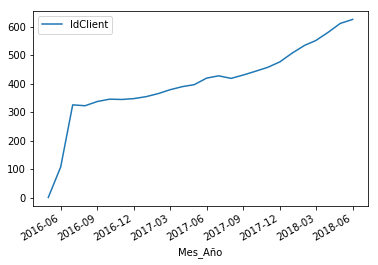

In [652]:
import matplotlib.pyplot as plt
Tabla_Clientes.plot()

Podríamos decir que la evolución de clientes distintos que operan en el período analizado es bastante buena,tiene una primera parte hasta el mes de Julio de 2016 de gran aumento (implantación del servicio??) y desde ahí hasta el mes de julio de 2017 tiene tendencia creciente ; el único punto donde decrece es en agosto de 2017 (lógico,vacaciones) y desde ahí hasta el final del período analizado presenta una tendencia de clientes únicos creciente ( es decir,la diferencia entre altas y bajas del servicio es positiva ).

In [625]:
arval_table[(arval_table['Mes_Año']=='2016-5')]

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS,Mes_Año
DateHeure,,,,,,,,,,,,,,,,,,,,,
4136,3183016,2016-05-23,Diesel,DIESEL,$8.13,1166,5172131,9.62,$10.00,D,...,1.6 HDi 90 XTR Plus,5.2,60.0,CITROEN,DIESEL,PCA,22080,Pack Advanced,1,2016-5


55.Diferencia Brutos como otra Variable (Bonif.Total)
-

In [655]:
arval_table['TotalBrutTTC'] = arval_table['TotalBrutTTC'].str.replace(r'\D', '').astype(int)
arval_table['TotalBrutTTC'] = arval_table['TotalBrutTTC']/100
arval_table['TotalBrutTVA'] = arval_table['TotalBrutTVA'].str.replace(r'\D', '').astype(int)
arval_table['TotalBrutTVA'] = arval_table['TotalBrutTVA']/100

In [659]:
arval_table['TotalNetHT'] = arval_table['TotalNetHT'].str.replace(r'\D', '').astype(int)
arval_table['TotalNetHT'] = arval_table['TotalNetHT']/100
arval_table['PUBrutTTC'] = arval_table['PUBrutTTC'].str.replace(r'\D', '').astype(int)
arval_table['PUBrutTTC'] = arval_table['PUBrutTTC']/100

In [664]:
arval_table['BonifTotal'] = arval_table['BonifTotal'].str.replace(r'\D', '').astype(int)
arval_table['BonifTotal'] = arval_table['BonifTotal']/100

In [665]:
arval_table.head()

,IdLigneEtat,DateHeure,LibelleCategorieProduit,LibelleProduit,TotalNetHT,IdClient,IdVehicule,Quantite,TotalBrutTTC,TipoOperacion,...,DupLibelleModeleVehicule,DupConsommation,CapaciteReservoir,libelle_marque,libelle_energie,CodeDivision,ReferenceORFI,tipo_pack,flag_dctoEESS,Mes_Año
DateHeure,,,,,,,,,,,,,,,,,,,,,
0,4230401,2018-02-20,Diesel,DIESEL,39.66,1401,13575773,44.68,50.00,V,...,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1,2018-2
1,4230752,2018-02-27,Diesel,DIESEL,46.93,1401,13830589,49.21,59.00,V,...,sDrive18d,4.1,51.0,BMW,DIESEL,PCB,22052,Pack Basic,1,2018-2
2,4230050,2018-02-01,Diesel,DIESEL,64.23,1401,9456266,69.77,80.86,V,...,2.8 CRD SILVER,7.9,76.0,LANCIA,DIESEL,PCB,22052,Pack Basic,1,2018-2
3,4229705,2018-02-20,Diesel,DIESEL,48.72,1401,9456513,52.45,61.31,V,...,2.0 D4 Momentum Auto,4.7,70.0,VOLVO,DIESEL,PCB,22052,Pack Basic,1,2018-2
4,4230399,2018-02-05,Diesel,DIESEL,38.52,1401,13575773,42.22,48.51,V,...,1.6 TDI 110cv St&Sp Reference Conne,40.0,50.0,SEAT,DIESEL,PCB,22052,Pack Basic,1,2018-2


In [668]:
arval_table2= arval_table[['TotalNetHT','TotalBrutTVA','TotalBrutTTC','BonifTotal']]
arval_table2['Bruto_Teórico']=arval_table2['TotalNetHT']+arval_table2['TotalBrutTVA']
arval_table2['Diferencia_brutos']=arval_table2['TotalBrutTTC']-arval_table2['Bruto_Teórico']
arval_table2['distinto']=arval_table2['Diferencia_brutos']!=0
arval_table2['Bonif?Diferencia_brutos']=arval_table2['Diferencia_brutos']-arval_table2['BonifTotal']<0.01
arval_table2.head(20)

,TotalNetHT,TotalBrutTVA,TotalBrutTTC,BonifTotal,Bruto_Teórico,Diferencia_brutos,distinto,Bonif?Diferencia_brutos
DateHeure,,,,,,,,
0,39.66,8.68,50.00,1.66,48.34,1.66,True,True
1,46.93,10.24,59.00,1.83,57.17,1.83,True,True
2,64.23,14.03,80.86,2.59,78.26,2.60,True,True
3,48.72,10.64,61.31,1.95,59.36,1.95,True,True
4,38.52,8.42,48.51,1.57,46.94,1.57,True,True
5,62.52,13.65,78.63,2.46,76.17,2.46,True,True
6,55.31,12.08,69.63,2.23,67.39,2.24,True,True
7,46.90,10.24,59.00,1.86,57.14,1.86,True,True
8,37.38,8.16,47.02,1.48,45.54,1.48,True,True


In [669]:
comp=(arval_table2['Diferencia_brutos']-arval_table2['BonifTotal']<0.01)==True
len(comp)

1608957

Podemos observar que la diferencia de brutos difiere en menos de un céntimo con la Bonificación Total al 100% (gilipollas,me debería de haber dado cuenta) , por lo que la tarjeta tiene como beneficio el bonificar los impuestos.

56.¿La cifra que aparece en DupConsommation es la de consumo ofrecida por el fabricante?
-

In [671]:
arval_table.groupby('DupLibelleModeleVehicule').DupConsommation.nunique()

DupLibelleModeleVehicule
(Canarias) R-Line 2.0 TDI 150CV BMT    1
+2 1.5 dCi Acenta 4x2                  1
-                                      2
.                                      1
0                                      1
0,9 85cv TwinAir 4x4 EU6               1
1,1i ATTRACTION                        1
1,2 HDI 75 Multispace Attraction       1
1,3 Dynamic 90 CV Diesel Multijet 5    1
1,3 Dynamic 95 CV Multijet E5 S&S      1
1,6 CRDi 128 Style                     1
1.0                                    1
1.0 3-D BASALTO                        1
1.0 55KW Reference Plus                1
1.0 70 x-play                          1
1.0 70 x-play business                 1
1.0 75cv Style Connect                 1
1.0 EcoBoost 100 Auto Start-Stop Tr    1
1.0 EcoBoost A-S-S 125cv Edition       1
1.0 EcoTSI 110cv FR Crono              1
1.0 EcoTSI 70kW (95CV) Xcellence       1
1.0 Ecoboost Auto-St.-St. 92kW Tren    1
1.0 Essentia                           2
1.0 G (68CV) Acenta A/T         

In [697]:
consumo=arval_table.groupby('DupLibelleModeleVehicule').DupConsommation.nunique()!=1

tabla_consumo=pd.DataFrame(consumo)
tabla_consumo[(tabla_consumo['DupConsommation']==True)]

,DupConsommation
DupLibelleModeleVehicule,
-,True
1.0 Essentia,True
1.4 90D Active Touring Sports,True
1.4 TSI 122 CV Comfortline,True
1.5 TDCi 120CV Business,True
1.5 TDCi 88kW Titanium Powershift,True
1.5 TDCi 95CV Trend+,True
1.5dCi S&S VISIA 4x2,True
1.6 115D Feel! Touring Sports,True


Podemos ver que de los 2684 modelos de vehículos registrados en el análisis , aproximadamente el 90% tienen la misma cifra de consumo de combustible registrada en todas sus operaciones ; los modelos que aparecen en la tabla auxiliar anterior son los que reflejan más de una cifra de consumo en sus operaciones.  

57.Intentamos dar una mejor estimación de consumo por Id. de Vehículo:
-

Extraigo del dataframe original solo la fecha de operación,Id del vehículo,km apuntados y cantidad repostada

In [3]:
consumos=arval_table.loc[:,['DateHeure','IdVehicule','KmSaisie','Quantite']]
consumos.head()

,DateHeure,IdVehicule,KmSaisie,Quantite
0,20FEB2018:07:51:00.000,13575773,77500,44.68
1,27FEB2018:11:50:00.000,13830589,61098,49.21
2,01FEB2018:13:57:00.000,9456266,97351,69.77
3,20FEB2018:19:58:00.000,9456513,174190,52.45
4,05FEB2018:14:35:00.000,13575773,75900,42.22


Para limpiar los datos,ordeno las operaciones por fechas,elimino aquellas operaciones que no tienen apuntados km (0km)

In [4]:
import datetime
consumos['DateHeure'] = consumos['DateHeure'].str.split(':').str[0]
consumos['DateHeure'] =  pd.to_datetime(consumos['DateHeure'], infer_datetime_format=True)
consumos.head(20)

,DateHeure,IdVehicule,KmSaisie,Quantite
0,2018-02-20,13575773,77500,44.68
1,2018-02-27,13830589,61098,49.21
2,2018-02-01,9456266,97351,69.77
3,2018-02-20,9456513,174190,52.45
4,2018-02-05,13575773,75900,42.22
5,2018-02-11,9456513,173469,66.13
6,2018-02-23,9456513,175562,60.08
7,2018-02-08,13830589,60386,50.04
8,2018-02-14,13575773,76900,39.88
9,2018-02-22,9456513,175009,47.10


In [5]:
consumos.sort_values(by='DateHeure', inplace=True)
consumos=consumos[consumos.KmSaisie != 0]
consumos.head(20)

,DateHeure,IdVehicule,KmSaisie,Quantite
894163,2016-07-01,10041161,25184,66.99
1117518,2016-07-01,8776170,33384,43.26
1059368,2016-07-01,9212213,94518,33.00
387836,2016-07-01,13508496,6050,51.90
387837,2016-07-01,13508496,6050,0.00
954981,2016-07-01,10026060,35450,45.91
1027092,2016-07-01,6293131,114600,47.71
231649,2016-07-01,12697050,18447,63.69
985243,2016-07-01,14677658,4166,43.92
894158,2016-07-01,10041073,28235,57.20


In [7]:
consumos.shape

(414848, 4)

In [6]:
consumos.groupby('IdVehicule')['KmSaisie'].unique()

IdVehicule
536522             [81119, 81821, 82558, 83128, 83817, 84226]
606869                                  [32600, 33994, 35120]
637370                                                [48495]
957602             [74856, 75340, 75670, 76163, 76570, 76900]
958908      [160879, 161443, 161908, 162951, 163492, 16386...
958920      [76009, 76365, 76690, 77141, 77438, 77907, 782...
958956      [133973, 134466, 134828, 135088, 135497, 12592...
959052                       [130450, 130944, 131575, 132180]
960259      [138649, 138690, 139141, 139627, 140280, 14071...
971075      [127175, 127750, 128500, 128715, 129810, 12963...
971350      [136838, 137494, 138218, 139412, 140672, 14201...
971863                               [137466, 137690, 138173]
973442                                         [47316, 48700]
975255      [119632, 121354, 121935, 123026, 123601, 12419...
975267      [128777, 129178, 129693, 130340, 130743, 13200...
975315      [122737, 123220, 123727, 125468, 126688, 12731.

Defino una función para eliminar los datos outliers (fuera de (media-2Sigma,media+2Sigma) sobre la lista de km por IdVehiculo -> posibles equivocaciones al apuntar los km)   

In [10]:
import numpy as np

In [11]:
def flag_outlier(x):
    lower_limit  = np.mean(x) - np.std(x) * 2 
    upper_limit = np.mean(x) + np.std(x) * 2
    return (x>upper_limit)| (x<lower_limit)

In [12]:
consumos['Flag'] = consumos.groupby('IdVehicule')['KmSaisie'].apply(flag_outlier)

In [13]:
consumos[consumos.Flag==True]

,DateHeure,IdVehicule,KmSaisie,Quantite,Flag
1226341,2016-07-01,10518759,130800,47.40,True
1357146,2016-07-01,9519640,151470,47.40,True
1267518,2016-07-01,12984088,12920,62.32,True
452586,2016-07-01,6316762,100000,28.33,True
1123914,2016-07-01,7170182,68242,39.87,True
202505,2016-07-01,4365668,183560,56.50,True
1291227,2016-07-01,11511802,30289,76.26,True
514300,2016-07-01,9131860,47312,52.68,True
1242671,2016-07-01,9907353,239484,47.12,True
1085088,2016-07-01,10613713,42500,46.69,True


Como vemos,tenemos 4375 outliers,que eliminamos del dataframe

In [14]:
consumos=consumos[consumos.Flag==False]

In [15]:
consumos.shape

(410473, 5)

In [16]:
consumos.groupby('IdVehicule')['KmSaisie'].unique()

IdVehicule
536522             [81119, 81821, 82558, 83128, 83817, 84226]
606869                                  [32600, 33994, 35120]
637370                                                [48495]
957602             [74856, 75340, 75670, 76163, 76570, 76900]
958908      [160879, 161443, 161908, 162951, 163492, 16386...
958920      [76009, 76365, 76690, 77141, 77438, 77907, 782...
958956      [133973, 134466, 134828, 135088, 135497, 13611...
959052                       [130450, 130944, 131575, 132180]
960259      [138649, 138690, 139141, 139627, 140280, 14071...
971075      [127175, 127750, 128500, 128715, 129810, 12963...
971350      [136838, 137494, 138218, 139412, 140672, 14201...
971863                               [137466, 137690, 138173]
973442                                         [47316, 48700]
975255      [119632, 121354, 121935, 123026, 123601, 12419...
975267      [128777, 129178, 129693, 130340, 130743, 13200...
975315      [122737, 123220, 123727, 125468, 126688, 12731.

In [17]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count()}

In [18]:
df=consumos.groupby('IdVehicule')['KmSaisie'].apply(get_stats).unstack()

In [19]:
df['dif_km']=df['max']-df['min']

In [20]:
df['Quantite']=consumos.groupby('IdVehicule')['Quantite'].apply(sum)

In [21]:
df.head()

,count,max,min,dif_km,Quantite
IdVehicule,,,,,
536522,6,84226,81119,3107,453.50
606869,3,35120,32600,2520,187.94
637370,1,48495,48495,0,21.51
957602,6,76900,74856,2044,324.22
958908,36,175765,160879,14886,730.90


Defino una función de estimación (no consigo solucionar cómo no sumar la cantidad del último repostaje)

In [22]:
df['Estimación']=(df['Quantite']/df['dif_km']*100).where((df['dif_km']>0)&(df['dif_km']<400000),-1)

In [23]:
df.head(20)

,count,max,min,dif_km,Quantite,Estimación
IdVehicule,,,,,,
536522,6,84226,81119,3107,453.50,14.596073
606869,3,35120,32600,2520,187.94,7.457937
637370,1,48495,48495,0,21.51,-1.000000
957602,6,76900,74856,2044,324.22,15.862035
958908,36,175765,160879,14886,730.90,4.909983
958920,12,80128,76009,4119,235.34,5.713523
958956,21,142515,133973,8542,503.76,5.897448
959052,4,132180,130450,1730,134.70,7.786127
960259,29,150950,138649,12301,742.42,6.035444


Solo considero dato fiable a aquellos que estén entre 4 y 40 l/100km:

In [24]:
df[(df['Estimación']<40)&(df['Estimación']>4)].count()

count         10219
max           10219
min           10219
dif_km        10219
Quantite      10219
Estimación    10219
dtype: int64

Considero dato Aproximado a aquellos por encima de 0 l/100km:

In [26]:
df[(df['Estimación']>1)].count()

count         11398
max           11398
min           11398
dif_km        11398
Quantite      11398
Estimación    11398
dtype: int64

Por tanto,los porcentajes de datos de consumo sobre el total serían:
-

In [29]:
Porcentaje_Consumo_Fiable=10219/16824*100
Porcentaje_Consumo_Aprox=11398/16824*100
print(Porcentaje_Consumo_Fiable)
print(Porcentaje_Consumo_Aprox)

60.74060865430337
67.74845458868283
